In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import colors

In [128]:
original_data = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]
])

original_data = np.reshape(original_data, (23, 41))

In [139]:
transposed_data = np.transpose(original_data.copy())
col_sorted_data = transposed_data[np.argsort([-1 * np.count_nonzero(col) for col in transposed_data], kind = "stable")]
col_sorted_data = np.transpose(col_sorted_data)

In [126]:
# ordered_data = original_data.copy()[np.argsort([np.count_nonzero(row) for row in original_data], kind = "stable")]
# row_sorted_data = ordered_data.copy()
# #row_sorted_data[10], row_sorted_data[11], row_sorted_data[12], row_sorted_data[13], row_sorted_data[14] = ordered_data[13], ordered_data[14], ordered_data[12], ordered_data[10], ordered_data[11]

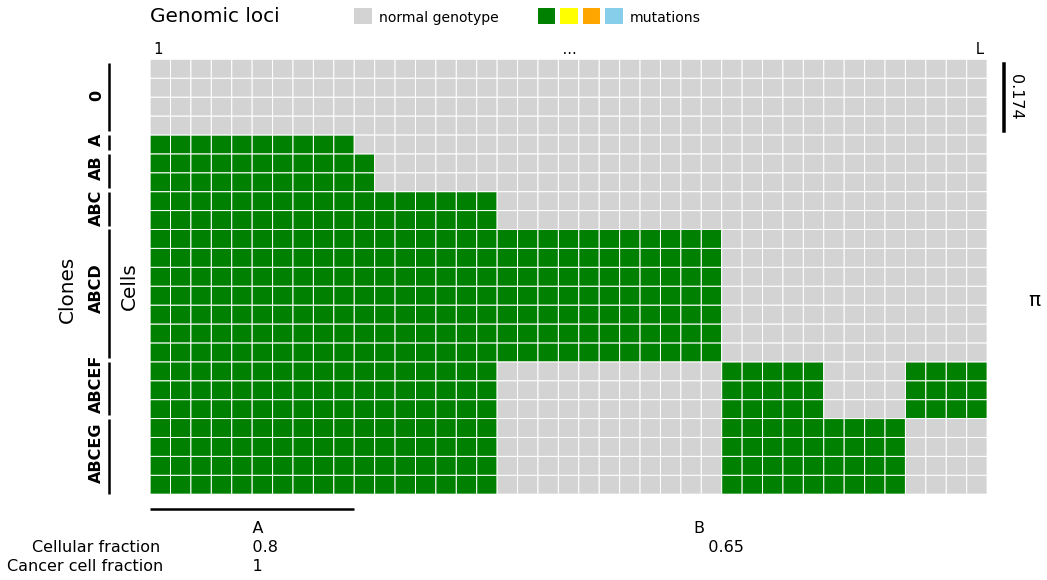

In [196]:
# Set colour map
cmap = colors.ListedColormap(['lightgrey','red', 'Green'])

# Create plot and add data
plt.figure(figsize = (15, 8))
plt.pcolor(col_sorted_data[::-1], cmap = cmap, edgecolors = 'white', linewidths = 1)

# Hide plot edge and axes
plt.box(False)
plt.axis('off')

# Set title and axis labels
plt.title("1" + " " * 84 + "..." + " " * 84 + "L", fontsize = 15)
plt.text(0, 25, "Genomic loci", fontsize = 20)
plt.text(-1.5, 10, "Cells", fontsize = 20, rotation = 90)
plt.text(-4.5, 9.3, "Clones", fontsize = 20, rotation = 90)
plt.text(43, 10, "π", fontsize = 20)

# Add legend
plt.gca().add_patch(patches.Rectangle((10, 24.9), 0.8, 0.8, fill = True,
                                      color = "lightgrey", clip_on = False,
                                      linewidth = 1))
plt.gca().add_patch(patches.Rectangle((19, 24.9), 0.8, 0.8, fill = True,
                                      color = "green", clip_on = False,
                                      linewidth = 1))
plt.gca().add_patch(patches.Rectangle((20.1, 24.9), 0.8, 0.8, fill = True,
                                      color = "yellow", clip_on = False,
                                      linewidth = 1))
plt.gca().add_patch(patches.Rectangle((21.2, 24.9), 0.8, 0.8, fill = True,
                                      color = "orange", clip_on = False,
                                      linewidth = 1))
plt.gca().add_patch(patches.Rectangle((22.3, 24.9), 0.8, 0.8, fill = True,
                                      color = "skyblue", clip_on = False,
                                      linewidth = 1))
plt.text(11.2, 25, "normal genotype", fontsize = 14)
plt.text(23.5, 25, "mutations", fontsize = 14)

# Add left lines and annotations
plt.gca().add_patch(patches.Rectangle((-2, 19.2), 0.005, 3.6, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((-2, 18.2), 0.005, 0.8, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((-2, 16.2), 0.005, 1.8, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((-2, 14.2), 0.005, 1.8, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((-2, 7.2), 0.005, 6.8, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((-2, 4.2), 0.005, 2.8, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((-2, 0), 0.005, 4, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.text(-3, 21, "0", fontsize = 16, rotation = 90, fontweight = 'bold')
plt.text(-3, 18.6, "A", fontsize = 16, rotation = 90, fontweight = 'bold')
plt.text(-3, 16.8, "AB", fontsize = 16, rotation = 90, fontweight = 'bold')
plt.text(-3, 14.4, "ABC", fontsize = 16, rotation = 90, fontweight = 'bold')
plt.text(-3, 9.8, "ABCD", fontsize = 16, rotation = 90, fontweight = 'bold')
plt.text(-3, 4.5, "ABCEF", fontsize = 16, rotation = 90, fontweight = 'bold')
plt.text(-3, 0.8, "ABCEG", fontsize = 16, rotation = 90, fontweight = 'bold')

# Add lower lines and annotations
plt.gca().add_patch(patches.Rectangle((0, -0.8), 10, 0.005, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))

plt.text(0, -2, " " * 20 + "A" + " " * 84 + "B", fontsize = 16)
plt.text(0, -3, " " * 20 + "0.8" + " " * 84 + "0.65", fontsize = 16)
plt.text(0, -4, " " * 20 + "1", fontsize = 16)

plt.text(-5.8, -3, "Cellular fraction", fontsize = 16)
plt.text(-7, -4, "Cancer cell fraction", fontsize = 16)

# Add right lines and annotations
plt.gca().add_patch(patches.Rectangle((41.8, 19.2), 0.005, 3.6, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.text(42, 20, "0.174", fontsize = 16, rotation = 270)

plt.show()